<a href="https://colab.research.google.com/github/lanYangweb/gene_expression_cancer_RNA_Seq/blob/main/Test_on_featrues_selection_Lan_YANG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow
!pip install rarfile
!pip install torch


In [4]:
#########################
# Packages installation and Python version #
#########################

import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import tensorflow as tf
import rarfile
import math
import matplotlib.pyplot as plt
import torch

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from numpy import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from keras.models import Model
from keras.layers import Dense, Input


!python --version

print("pandas", pd.__version__, "numpy", np.__version__, "sklearn", sklearn.__version__, "matplotlib", matplotlib.__version__, "keras", keras.__version__, "tensorflow", tf.__version__, "rarfile", rarfile.__version__, "torch", torch.__version__)
# "tensorflow", tf.__version__,
# pandas 1.5.3 numpy 1.23.5 sklearn 1.2.2 matplotlib 3.7.1 keras 2.14.0

Python 3.10.12
pandas 1.5.3 numpy 1.23.5 sklearn 1.2.2 matplotlib 3.7.1 keras 2.15.0 tensorflow 2.15.0 rarfile 4.1 torch 2.1.0+cu121


1. Import Datasets

In [6]:
import requests
from io import BytesIO
# Download the RAR file(github only allowed files not larger than 100M, so I uploaded compressed data.csv)
url = 'https://github.com/lanYangweb/gene_expression_cancer_RNA_Seq/raw/main/data.rar'
response = requests.get(url)
rar_content = BytesIO(response.content)

# Extract the contents of the RAR file
with rarfile.RarFile(rar_content, 'r') as rf:
    csv_file = rf.namelist()[0]
    data = pd.read_csv(rf.open(csv_file))

# Display the loaded data
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [7]:
# import label table
url = 'https://github.com/lanYangweb/gene_expression_cancer_RNA_Seq/raw/main/labels.csv'
labels = pd.read_csv(url)
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


2. Data splitting and exploration

In [8]:
# data splitting
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
X = data.iloc[:,1:]
Y = labels['Class']

# encoding tumor type Y into numbers
label_encoder = LabelEncoder()
# label_encoder.fit(Y)
Y_encoded = label_encoder.fit_transform(Y)

label = label_encoder.classes_
classes = np.unique(Y_encoded)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.25, random_state=42)

In [ ]:
# import label table
url = 'https://github.com/lanYangweb/gene_expression_cancer_RNA_Seq/raw/main/labels.csv'
labels = pd.read_csv(url)
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [ ]:
# Normalization of the gene expression data

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



In [11]:
# Feature selection using random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


# Feature selection using random forests
rf1 = RandomForestClassifier(n_estimators=20, random_state=42)
rf2 = RandomForestClassifier(n_estimators=5, random_state=42)
rf3 = RandomForestClassifier(n_estimators=10, random_state=42)
rf1.fit(X_train_scaled, Y_train)
rf2.fit(X_train_scaled, Y_train)
rf3.fit(X_train_scaled, Y_train)

# Feature selection using SelectFromModel
sfm1 = SelectFromModel(rf1, threshold='mean')
sfm1.fit(X_train_scaled, Y_train)

sfm2 = SelectFromModel(rf2, threshold='mean')
sfm2.fit(X_train_scaled, Y_train)

sfm3 = SelectFromModel(rf3, threshold='mean')
sfm3.fit(X_train_scaled, Y_train)

# Get selected features
selected_features1 = sfm1.get_support(indices=True)
selected_features2 = sfm2.get_support(indices=True)
selected_features3 = sfm3.get_support(indices=True)

# Train using selected features
X_train_selected1 = X_train_scaled[:, selected_features1]
X_test_selected1 = X_test_scaled[:, selected_features1]

X_train_selected2 = X_train_scaled[:, selected_features2]
X_test_selected2 = X_test_scaled[:, selected_features2]

X_train_selected3 = X_train_scaled[:, selected_features3]
X_test_selected3 = X_test_scaled[:, selected_features3]

num_selected_features1 = X_train_selected1.shape[1]

num_selected_features2 = X_train_selected2.shape[1]

num_selected_features3 = X_train_selected3.shape[1]

print(f"Number of selected features 1: {num_selected_features1}")

print(f"Number of selected features 2: {num_selected_features2}")

print(f"Number of selected features 3: {num_selected_features3}")


Number of selected features 1: 379
Number of selected features 2: 97
Number of selected features 3: 193


Best parameters: {'estimator__max_depth': 5, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 50}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1score: 1.0


classification report


              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        80
        COAD       1.00      1.00      1.00        21
        KIRC       1.00      1.00      1.00        31
        LUAD       1.00      1.00      1.00        35
        PRAD       1.00      1.00      1.00        34

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



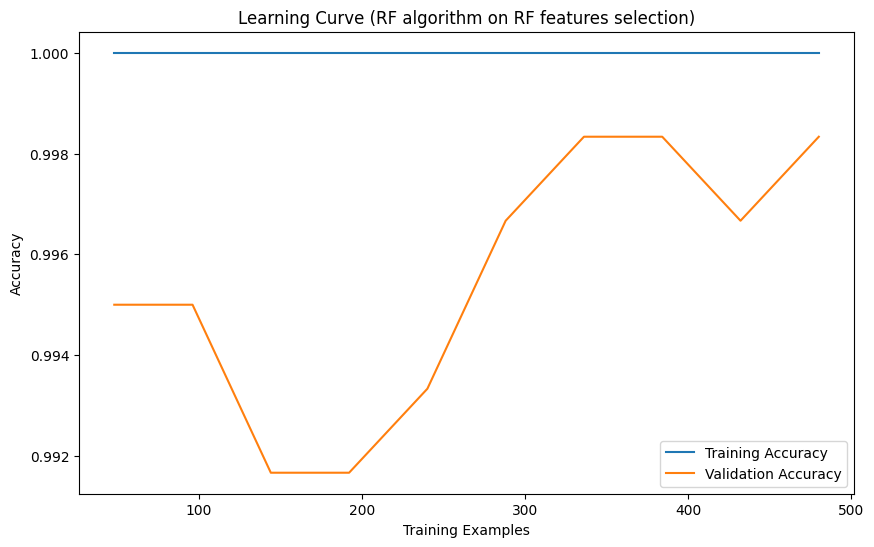

In [14]:
#########################
# Number of selected features 1: 379 # Time: 2mins
# n_estimators=20  #
#########################
# RF algorithm on RF features selection (take about 1min)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# Wrap random forest classifier in OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
# Set parameter search range
param_grid = {
    'estimator__n_estimators': [5, 10, 25, 50],
    'estimator__max_depth': [5, 10],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 5]
}
# Search parameters using GridSearchCV
grid_search = GridSearchCV(ovr_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1) # n_jobs：Parallelization
grid_search.fit(X_train_selected1, Y_train)

# Output the best parameters
print("Best parameters:", grid_search.best_params_)

# Use the model with the best parameters to make predictions
best_classifier = grid_search.best_estimator_
Y_pred = best_classifier.predict(X_test_selected1)

# accuracy
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, Y_pred)
# precision
precision = np.round(precision_score(Y_test, Y_pred, average = 'weighted'),4)
# recall
recall = np.round(recall_score(Y_test, Y_pred, average = 'weighted'),4)
# F1 score
F1score = np.round(f1_score(Y_test, Y_pred, average = 'weighted'),4)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1score: {F1score}")

# classification report
report = classification_report(Y_test, Y_pred, target_names=label)
print('\n')
print('classification report\n\n')
print(report)

# learning curve
train_sizes, train_scores, test_scores = learning_curve(best_classifier, X_train_selected1, Y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (RF algorithm on RF features selection)')
plt.legend()
plt.show()


Best parameters: {'estimator__max_depth': 5, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 50}
Accuracy: 0.9950248756218906
Precision: 0.9951
Recall: 0.995
F1score: 0.995


classification report


              precision    recall  f1-score   support

        BRCA       0.99      1.00      0.99        80
        COAD       1.00      1.00      1.00        21
        KIRC       1.00      1.00      1.00        31
        LUAD       1.00      1.00      1.00        35
        PRAD       1.00      0.97      0.99        34

    accuracy                           1.00       201
   macro avg       1.00      0.99      1.00       201
weighted avg       1.00      1.00      1.00       201



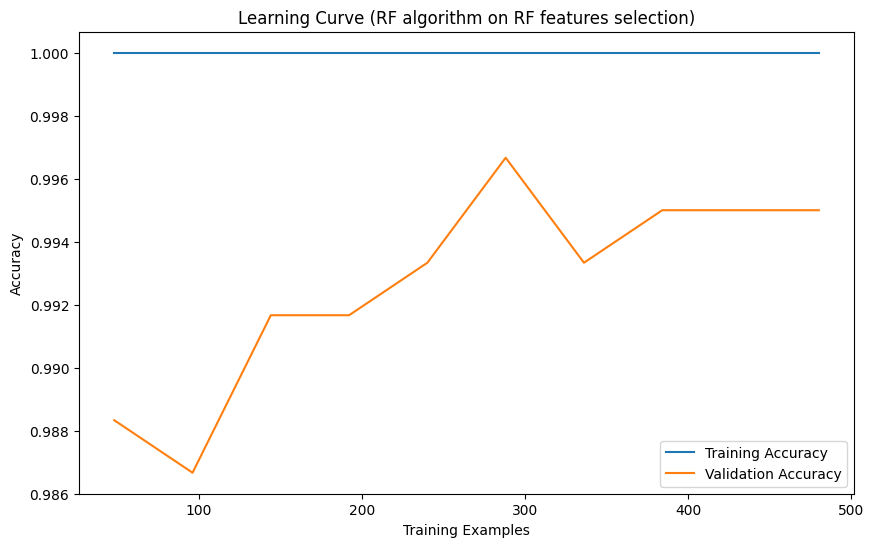

In [15]:
#########################
# Number of selected features 2: 97 #
# n_estimators=5  #
#########################
# RF algorithm on RF features selection (take about 1min)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# Wrap random forest classifier in OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
# Set parameter search range
param_grid = {
    'estimator__n_estimators': [5, 10, 25, 50],
    'estimator__max_depth': [5, 10],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 5]
}
# Search parameters using GridSearchCV
grid_search = GridSearchCV(ovr_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1) # n_jobs：Parallelization
grid_search.fit(X_train_selected2, Y_train)

# Output the best parameters
print("Best parameters:", grid_search.best_params_)

# Use the model with the best parameters to make predictions
best_classifier = grid_search.best_estimator_
Y_pred = best_classifier.predict(X_test_selected2)

# accuracy
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, Y_pred)
# precision
precision = np.round(precision_score(Y_test, Y_pred, average = 'weighted'),4)
# recall
recall = np.round(recall_score(Y_test, Y_pred, average = 'weighted'),4)
# F1 score
F1score = np.round(f1_score(Y_test, Y_pred, average = 'weighted'),4)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1score: {F1score}")

# classification report
report = classification_report(Y_test, Y_pred, target_names=label)
print('\n')
print('classification report\n\n')
print(report)

# learning curve
train_sizes, train_scores, test_scores = learning_curve(best_classifier, X_train_selected2, Y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (RF algorithm on RF features selection)')
plt.legend()
plt.show()


Best parameters: {'estimator__max_depth': 5, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 10}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1score: 1.0


classification report


              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        80
        COAD       1.00      1.00      1.00        21
        KIRC       1.00      1.00      1.00        31
        LUAD       1.00      1.00      1.00        35
        PRAD       1.00      1.00      1.00        34

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



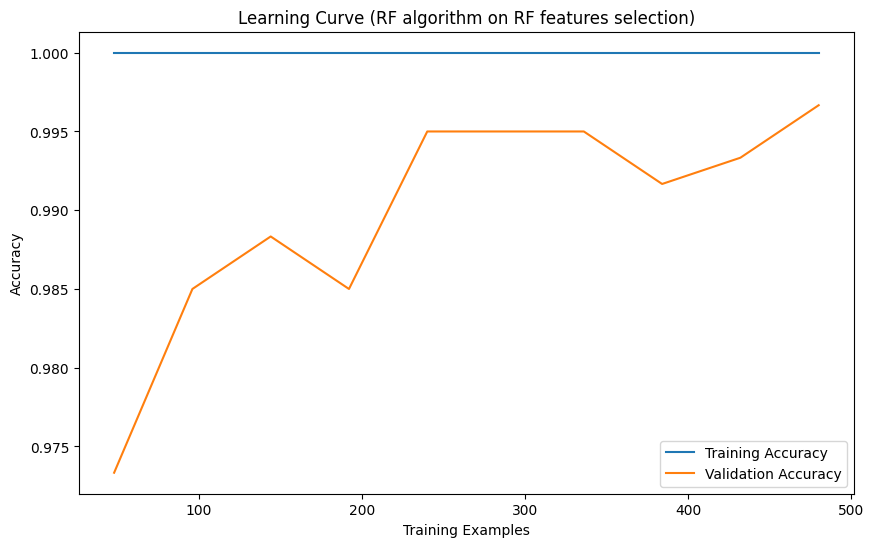

In [16]:
#########################
# Number of selected features 3: 193 #
# n_estimators=10  #
#########################
# RF algorithm on RF features selection (take about 1min)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# Wrap random forest classifier in OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
# Set parameter search range
param_grid = {
    'estimator__n_estimators': [5, 10, 25, 50],
    'estimator__max_depth': [5, 10],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 5]
}
# Search parameters using GridSearchCV
grid_search = GridSearchCV(ovr_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1) # n_jobs：Parallelization
grid_search.fit(X_train_selected3, Y_train)

# Output the best parameters
print("Best parameters:", grid_search.best_params_)

# Use the model with the best parameters to make predictions
best_classifier = grid_search.best_estimator_
Y_pred = best_classifier.predict(X_test_selected3)

# accuracy
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, Y_pred)
# precision
precision = np.round(precision_score(Y_test, Y_pred, average = 'weighted'),4)
# recall
recall = np.round(recall_score(Y_test, Y_pred, average = 'weighted'),4)
# F1 score
F1score = np.round(f1_score(Y_test, Y_pred, average = 'weighted'),4)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1score: {F1score}")

# classification report
report = classification_report(Y_test, Y_pred, target_names=label)
print('\n')
print('classification report\n\n')
print(report)

# learning curve
train_sizes, train_scores, test_scores = learning_curve(best_classifier, X_train_selected3, Y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (RF algorithm on RF features selection)')
plt.legend()
plt.show()
